## Neural Network vs Logistic Regression for Binary Classification




### Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.


In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import os 

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent over iterations

From sklearns datasets create a guassian quantiles dataset and load it into variables X and Y

In [2]:
def load_extra_datasets():  
    N = 200
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    return  gaussian_quantiles

In [3]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y[0], cmap=plt.cm.Spectral)

In [4]:
def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

In [5]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

In [6]:
def load_extra_datasets2():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

[[0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1
  0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0
  1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0
  0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0
  0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0
  0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0]]
(1, 200)


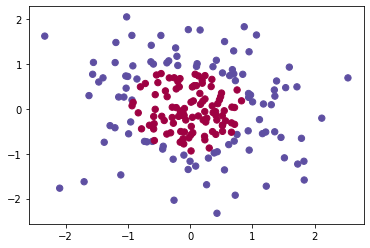

In [7]:

gaussian_quantiles= load_extra_datasets()
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
colors = Y
print(colors)
print(colors.shape)
# Visualize the data
# Changed from `c=Y` to `c=Y[0]` due to a change in `matplotlib`. See https://github.com/matplotlib/matplotlib/issues/11919
plt.scatter(X[0, :], X[1, :], c=(Y[0]), s=40, cmap=plt.cm.Spectral);

In [8]:
shape_X = X.shape
shape_Y = Y.shape


print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
# print ('No of Examples %d!' % (m))

The shape of X is: (2, 200)
The shape of Y is: (1, 200)


## Simple Logistic Regression

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [9]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV();
#clf.fit(X.T, Y.T);
clf.fit(X.T, Y.T.ravel());

You can now plot the decision boundary of these models. Run the code below.

Accuracy of logistic regression: 55 % (percentage of correctly labelled datapoints)


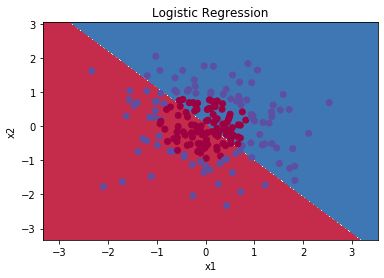

In [10]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now! 

### Now lets build a Neural Network model with one hidden layer


Below is the structure of the NN Model

    1. Define the neural network structure ( # of input units, # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)
    4. Then merge them into one function we call `nn_model()`. 
    Once we built `nn_model()` and learnt the right parameters,we can make predictions on new data.

### 4.1 - Defining the neural network structure ####
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer
    - n_y: the size of the output layer

In [11]:
#layer_sizes

def layer_sizes(X, n_h, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0] # size of input layer`
    n_y =Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [12]:
# initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
        
    # numpy.random.randn(d0, d1, ..., dn)
    # Return a sample (or samples) from the “standard normal” distribution.
    
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    
    print("LAYER SIZES")
    print("Input Layer n_x = ", n_x)
    print("Hidden Layer0 n_h = ", n_h)
    print("Output Layer n_y = ", n_y)
    print()
    print("WEIGHTS AND BIASES")
    print("Weight shapes are next layer size rows x current layer size columns.") 
    print("Rows represent weights coming from each input node. If the next layer ")
    print("contains three nodes, then each input node has three weights. A column ")
    print("indicates which input node a weight comes from. ")
    print("Three weights x two input nodes = 3x2 matrix.")
    print("Bias shapes are next layer size rows x 1 column")
    print("W1 =\n", W1)
    print("b1 =\n", b1)
    print("W2 =\n", W2)
    print("b2 =\n", b2)
    print()
    
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# Forward Propagation #

![Feed Forward](feed_forward_01.png)

# Forward Propagation 2#

Alternative formulas used in this code.

$g^{[n]}$: The activation function applied at a given layer. It could be replaced with $\sigma$.

$L$: Denotes the last layer.

$Z^{[1]} = W^{[1]}X + b^{[1]}$

$A^{[1]} = g^{[1]}(Z^{[1]})$

$Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]}$

$A^{[2]} = g^{[2]}(Z^{[2]})$

$\vdots$

$A^{[L]} = g^{[L]}(Z^{[2]})$




In [13]:
#forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    
    
    
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2A = np.dot(W2,A1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    
    
    
    return A2, cache

# Loss Function

Common loss functions

* Cross-Entropy: Classification
* Hinge: Classification
* Huber: Regression
* Kullback-Leibler
* MAE (L1)
* MSE (L2) 

See https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

## Cross-Entropy Function ##

### Binary Classification ###

$$-{(y\log(p) + (1 - y)\log(1 - p))}$$

In this example, we use this:

$$-{(Y\log(A2) + (1 - Y)\log(1 - A2))}$$

### Multi-class Classification ###
Let M be the number of classes. If M > 2, we calculate a separate loss for each class label per observation and sum the result.

$$-\sum_{c=1}^My_{o,c}\log(p_{o,c})$$

* M - number of classes (dog, cat, fish)
* log - the natural log
* y - binary indicator (0 or 1) if class label c is the correct classification for observation o
* p - predicted probability observation o is of class c

## Huber Function
$
\begin{split}L_{\delta}=\left\{\begin{matrix}
\frac{1}{2}(y - \hat{y})^{2} & if \left | (y - \hat{y})  \right | < \delta\\
\delta ((y - \hat{y}) - \frac1 2 \delta) & otherwise
\end{matrix}\right.\end{split}
$


In [14]:
# compute_cost

def compute_cost(A2, Y, parameters, iteration_number=0):
    """
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    
    m = Y.shape[1] # number of example
    if iteration_number < 1:
        print("A2 shape", A2.shape)
        print("Y shape", Y.shape)
        print("m = ", m)

    # Compute the cross-entropy cost
    # np.multiply is an element-wise (Hadamard) product.
    # np.log(A2) ∘ Y
    # np.log is the natural logarithm.
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
    
    cost = - np.sum(logprobs) / m    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
        
    if iteration_number < 1:
        print("logprobs.shape =", logprobs.shape)
        print("cost =", cost)
        print()
    
    return cost

# Backpropagation

Backpropagation is about adjusting weights and biases. The goal is to adjust weights to minimize the cost function. 


## Calculation for a Single Value

### Diagram ###

Consider a network with two layers, each of which contains one node. There is one weight between them, and there is one correct value (label).

```
    ------                    ------       ------
   |      |                  |      |     |      |
   | 0.48 | ---------------- | 0.66 |     | 1.00 | 
   |      |                  |      |     |      |
    ------                    ------       ------
    
    a[L-1]                     a[L]          y

```



### Pre-Activation ###
The weight of a previous layer node times the value of the node, plus a bias term. This is the activation (value) of a neuron before it is collapsed with the sigmoid function or relu.

$z^{(L)}$: Pre-activation of the last layer.

$w^{(L)}$: Weight to the last layer from the previous layer.

$a$: Activation (The value of a neuron)

$a^{(L-1)}$: Activation of a neuron in the previous layer.

$b^{(L)}$: Bias term, which is a constant.

$$z^{(L)} = w^{(L)}a^{(L-1)} + b^{(L)}$$


### Activation

$a^{(L)}$: Activation of the last layer.

$z^{(L)}$: Pre-activation of the last layer.

$σ$: Sigmoid function.

$$a^{(L)} = σ(z^{(L)})$$:


### Cost ###

$C_0$: Cost

$a^{(L)}$: Activation of the last layer.

$y$: The correct value (label)

$$C_0 = (a^{(L)} - y)^2$$


### Partial Derivative of Cost Function with Respect to Biast ###

$\sigma′(x) = \sigma(x)(1 - \sigma(x))$

$$\frac{\partial C_0}{\partial b^{(L)}} = \frac{\partial z^{(L)}}{\partial b^{(L)}} \frac{\partial a^{(L)}}{\partial z^{(L)}} \frac{\partial C_0}{\partial a^{(L)}} = a^{(L-1)}σ′(z^{(L)})2(a^{(L)} - y)$$


### Partial Derivative of Cost Function with Respect to Weight ###

$$\frac{\partial C_0}{\partial w^{(L)}} = \frac{\partial z^{(L)}}{\partial w^{(L)}} \frac{\partial a^{(L)}}{\partial z^{(L)}} \frac{\partial C_0}{\partial a^{(L)}} = 1σ′(z^{(L)})2(a^{(L)} - y)$$


### Partial Derivative of Cost Function with Respect to Activation in Previous Layer ###

$$\frac{\partial C_0}{\partial a^{(L-1)}} = \frac{\partial z^{(L)}}{\partial a^{(L-1)}} \frac{\partial a^{(L)}}{\partial z^{(L)}} \frac{\partial C_0}{\partial a^{(L)}} = w^{(L)}σ′(z^{(L)})2(a^{(L)} - y)$$


## Full Cost Function ##
Average of all training examples.

$$
\frac{\partial C}{\partial w^{(L)}} = \frac{1}{n} \sum_{k=0}^{n-1}\frac{\partial C_k}{\partial w^{(L)}}
$$


## Multiple Layers##

$\nabla C$: Gradient of cost.

$$ \nabla C = 
\begin{bmatrix}
\frac{\partial C}{\partial w^{(1)}}\\
\frac{\partial C}{\partial b^{(1)}}\\
...\\
\frac{\partial C}{\partial w^{(L)}}\\
\frac{\partial C}{\partial b^{(L)}}\\
\end{bmatrix}$$


## Multiple Neurons Per Layer

See https://www.youtube.com/watch?v=tIeHLnjs5U8




# Backpropagation 2

This code uses different formulas that presumably get us to the same place.
https://medium.com/@pdquant/all-the-backpropagation-derivatives-d5275f727f60

$dZ^{(L)} = A^{(L)} - Y$

$dW^{(L)} = \frac{1}{m}dZ^{(L)}A^{(L)^T}$

$db^{(L)} = \frac{1}{m} np.sum(dZ^{(L)}, axis=1, keepdims=True)$

$dZ^{(L-1)} = W^{(L)^T}dZ^{(L)}g′^{(L)}Z^{(L-1)}$

$\vdots$

$dZ^{(1)} = W^{(L)^T}dZ^{(2)}g′^{(1)}Z^{(1)}$

$dW^{(1)} = \frac{1}{m}dZ^{(1)}A^{(1)^T}$

$db^{(1)} = \frac{1}{m} np.sum(dZ^{(1)}, axis=1, keepdims=True)$


In [15]:
# backward_propagation

def backward_propagation(parameters, cache, X, Y, iteration_number=0):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 

    dZ2 = A2 - Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    if iteration_number < 1:
        print("DERIVATIVE")
        print("dW1.shape", dW1.shape)
        print("db1.shape", db1.shape)
        print("dW2.shape", dW2.shape)
        print("db2.shape", db2.shape)
        print()
    
    
    return grads

In [16]:
# update_parameters


def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    
    # Update rule for each parameter

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

###  Combine all the above into a  nn_model() funcction ####

In [17]:
# nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    print("DEFINITIONS of X and Y")
    print("X shape is features rows × samples columns.")
    print("Input Matrix X shape = ", X.shape)
    print("Y shape is classes rows × samples columns.")
    print("Output Matrix Y shape = ", Y.shape)
    print()
    
    
    
    np.random.seed(3)
    nodes_per_layer = layer_sizes(X, n_h, Y)
    n_x = nodes_per_layer[0]
    n_h = nodes_per_layer[1]
    n_y = nodes_per_layer[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    

    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2A = np.dot(W2,A1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)


    print("SUM 1")
    print("STEP 1: Sum over weights and X values.")
    print("Given two matrices, A and B, the dot product requires that the number of ")
    print("rows in A equal the number of columns in B.")
    print("m×n • n×p -> m×p")
    print("Weights W1", W1.shape)
    print("Values   X", X.shape)
    print("The Product is hidden layer nodes x samples.")
    print("Product Z1", Z1.shape)
    print("Bias b1", b1.shape)
    print()
        
    print("ACTIVATION FUNCTION 1")
    print("STEP 2: Apply an activation function, e.g. tanh, relu, sigmoid, softmax")
    print("Shape after activation function = A1", A1.shape)
    print("tanh is a scalar function.")
    print()
    
    print("SUM 2")
    print("STEP 3: Compute W2.A1 with bias term.")
    print("Z2 = ", Z2.shape)
    print()
    
    print("ACTIVATION FUCNTION 2")
    print("Apply an activation function, sigmoid in this example")
    print("A2 = ", A2.shape)
    print()
          
    
    
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y, parameters, i)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y, i)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [18]:
# predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X,parameters)
    predictions = A2 > 0.5
    ### END CODE HERE ###
    
    return predictions

Now we can run the Model on the entire data with 1 hidden layer (3 neurons) and 3000 epochs.

In [19]:
print("Features per sample, Samples = ", X.shape)

Features per sample, Samples =  (2, 200)


In [20]:
print("Output classes, samples = ", Y.shape)

Output classes, samples =  (1, 200)


DEFINITIONS of X and Y
X shape is features rows × samples columns.
Input Matrix X shape =  (2, 200)
Y shape is classes rows × samples columns.
Output Matrix Y shape =  (1, 200)

LAYER SIZES
Input Layer n_x =  2
Hidden Layer0 n_h =  3
Output Layer n_y =  1

WEIGHTS AND BIASES
Weight shapes are next layer size rows x current layer size columns.
Rows represent weights coming from each input node. If the next layer 
contains three nodes, then each input node has three weights. A column 
indicates which input node a weight comes from. 
Three weights x two input nodes = 3x2 matrix.
Bias shapes are next layer size rows x 1 column
W1 =
 [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]
 [-0.00277388 -0.00354759]]
b1 =
 [[0.]
 [0.]
 [0.]]
W2 =
 [[-0.00082741 -0.00627001 -0.00043818]]
b2 =
 [[0.]]

SUM 1
STEP 1: Sum over weights and X values.
Given two matrices, A and B, the dot product requires that the number of 
rows in A equal the number of columns in B.
m×n • n×p -> m×p
Weights W1 (3, 2

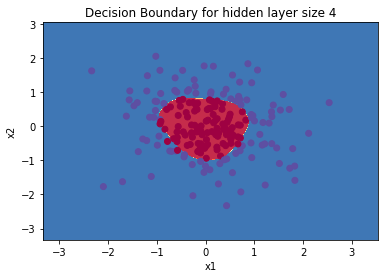

In [25]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 3, num_iterations = 5000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4));

In [26]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 98%


Accuracy is much higher compared to Logistic Regression. The model has learned the patterns well. 
Unilike logistic regressino,Neural networks are able to learn even highly non-linear decision boundaries.

Now, let's try out several hidden layer sizes.

DEFINITIONS of X and Y
X shape is features rows × samples columns.
Input Matrix X shape =  (2, 200)
Y shape is classes rows × samples columns.
Output Matrix Y shape =  (1, 200)

LAYER SIZES
Input Layer n_x =  2
Hidden Layer0 n_h =  1
Output Layer n_y =  1

WEIGHTS AND BIASES
Weight shapes are next layer size rows x current layer size columns.
Rows represent weights coming from each input node. If the next layer 
contains three nodes, then each input node has three weights. A column 
indicates which input node a weight comes from. 
Three weights x two input nodes = 3x2 matrix.
Bias shapes are next layer size rows x 1 column
W1 =
 [[0.01788628 0.0043651 ]]
b1 =
 [[0.]]
W2 =
 [[0.00096497]]
b2 =
 [[0.]]

SUM 1
STEP 1: Sum over weights and X values.
Given two matrices, A and B, the dot product requires that the number of 
rows in A equal the number of columns in B.
m×n • n×p -> m×p
Weights W1 (1, 2)
Values   X (2, 200)
The Product is hidden layer nodes x samples.
Product Z1 (1, 200)
Bias b

e:\development\python\venv363ml001\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
e:\development\python\venv363ml001\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


Accuracy for 20 hidden units: 98.0 %
DEFINITIONS of X and Y
X shape is features rows × samples columns.
Input Matrix X shape =  (2, 200)
Y shape is classes rows × samples columns.
Output Matrix Y shape =  (1, 200)

LAYER SIZES
Input Layer n_x =  2
Hidden Layer0 n_h =  50
Output Layer n_y =  1

WEIGHTS AND BIASES
Weight shapes are next layer size rows x current layer size columns.
Rows represent weights coming from each input node. If the next layer 
contains three nodes, then each input node has three weights. A column 
indicates which input node a weight comes from. 
Three weights x two input nodes = 3x2 matrix.
Bias shapes are next layer size rows x 1 column
W1 =
 [[ 0.01788628  0.0043651 ]
 [ 0.00096497 -0.01863493]
 [-0.00277388 -0.00354759]
 [-0.00082741 -0.00627001]
 [-0.00043818 -0.00477218]
 [-0.01313865  0.00884622]
 [ 0.00881318  0.01709573]
 [ 0.00050034 -0.00404677]
 [-0.0054536  -0.01546477]
 [ 0.00982367 -0.01101068]
 [-0.01185047 -0.0020565 ]
 [ 0.01486148  0.00236716]
 

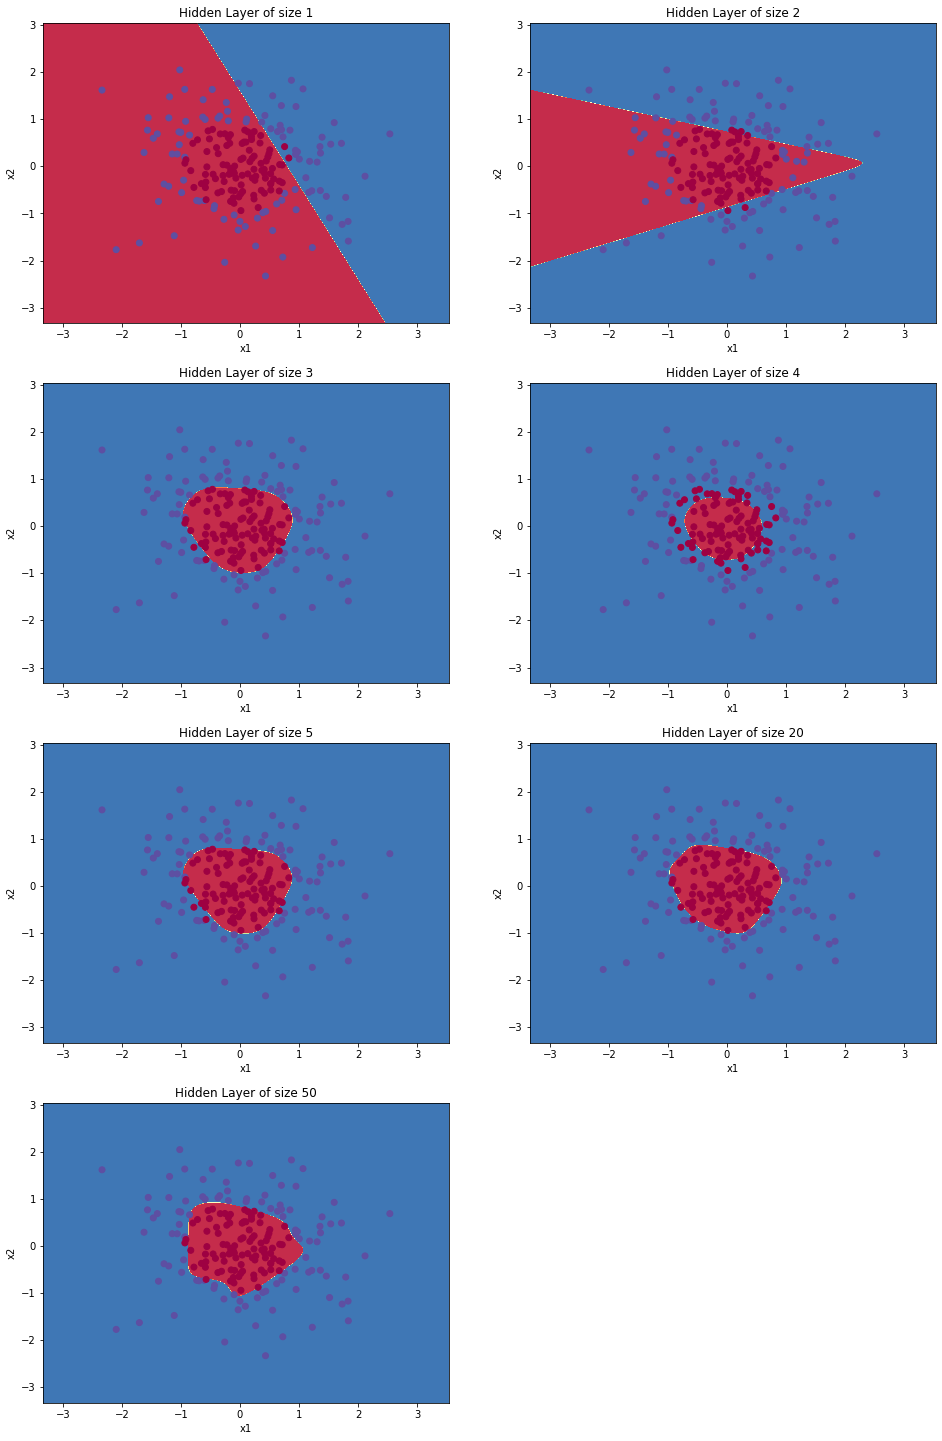

In [27]:
# Running the model with diffrent number of neurons in the hiddern layer

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 3. Indeed, a value around here seems to  fits the data well without also incurring noticable overfitting.
- We can see that at n_h = 50 the model seems overfitting. 